**Rationale** In this assignment, you will practice using logit models to analyze data with binary discrete outcomes.

You will be using the following [datasets](https://drive.google.com/drive/folders/1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x?usp=sharing). These are the same datasets from Assignment 4.

1. Orange telecom churn
1. Rent the runway

In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
fpath = 'drive/MyDrive/MKTG 3509/' # change this to your data folder
os.listdir(fpath)

['Module 1.ipynb',
 'Assignment 1',
 'A1 Tyler Sunday.ipynb',
 'module 2.ipynb',
 'A2 Tyler Sunday.ipynb',
 'Copy of Copy of avocado.xlsx',
 'Copy of avocado.json',
 'avocado (1).csv',
 'Colab',
 'movies.csv',
 'ratings_time.csv',
 'renttherunway_final_data.json',
 'telecom_churn.csv',
 'facebook_ads.csv',
 'starbucks_promos.csv',
 'starbucks_promos.gsheet',
 'Tyler_Sunday_A4_Visualization.ipynb',
 'Module 3.ipynb',
 'temple_traffic.csv',
 'avocado.csv',
 'Tyler_Sunday_A5 F2021 Stats Review.ipynb',
 'Untitled0.ipynb',
 'Tyler_Sunday_A7 F2021 Regression 2.ipynb',
 'Tyler_Sunday_A8  F2021 - Logit.ipynb']

# Problem 1 (5 Points)

Use the rent the runway dataset.

Preprocessing:

1. Replace missing values for "rented_for" column with "unspecified".
1. Replace missing values for "body_type" column with "unspecified".
1. Create a column "fit1" which is 0 everywhere except 1's where the value in the "fit" column == "fit", i.e. tranform the fit column to 0's and 1's, 0 where an item didn't fit and 1's where it did.

Run the following regression specified in the problem below.

In [ ]:
# read in the dataset, call it rent
# take a look at A4 for how to read in the json file

rent = pd.read_json(fpath + 'renttherunway_final_data.json', lines = True)

In [ ]:
# replace spaces in column names with underscores
# see last 2 assignments if you don't know how to do this

rent.columns = [c.replace(' ', '_') for c in rent.columns]

In [ ]:
# take a preview of the rent dataframe, refresh yourself of what's contained in the data
rent.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [ ]:
# create the 'fit1' column: 0's where item fits, 1 where it didn't
# if you forgot, go back to A4 to refresh your memory of how to do this

rent['fit1'] = 0
rent.loc[rent.fit == 'fit', 'fit1'] = 1

In [ ]:
rent.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,fit1
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",1
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",1
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,unspecified,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",1
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",1
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",1


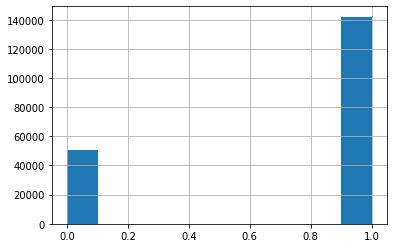

In [ ]:
# create a histogram for the fit1 column
# get a sense of the proportion of items that fit

rent.fit1.hist()


In [ ]:
# Replace missing values of column rented for with "unspecified" using 
# rent.rented_for.fillna('unspecified', inplace = True)

rent.rented_for.fillna('unspecified', inplace = True)


In [ ]:
# check the unique values in rented_for, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)

rent.rented_for.unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', 'unspecified', 'party: cocktail'], dtype=object)

In [ ]:
# replace missing values in body type column with "unspecified"

rent.body_type.fillna('unspecified', inplace = True)
rent['body_type'].replace({'NaN':'unspecified'}, inplace = True)
rent.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,fit1
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",1
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",1
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,unspecified,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",1
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",1
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",1


In [ ]:
# check the unique values in body_type, 
# make sure there are no missing values NaN (i.e. you did the fillna step correctly)

rent.body_type.unique()

array(['hourglass', 'straight & narrow', 'unspecified', 'pear',
       'athletic', 'full bust', 'petite', 'apple'], dtype=object)


Run the following regression

$$
Logit(fit1) = \beta_0 + \sum_{Occassion\ne everyday}\beta_{Occassion}+ \sum_{BodyType\ne petite}\beta_{BodyType} + e
$$

e.g. use occassion (rented_for) and body type as explanatory variables, but explciitly use the 'everyday' category as the reference group for occassion and the 'petite' category as the reference group for body type. If you don't know what this means, review the Module 6 notes on categorical variables and dummy coding.

In [ ]:
# estimate the logit model
# Recall from Module 6 notes, you can specify a reference group using C(varname, Treatment(reference = "reference group")),
# where "reference group" here would be "everyday" if the varname is rented_for

res = smf.logit('fit1 ~ C(rented_for, Treatment(reference = "everyday")) + C(body_type, Treatment(reference = "petite"))', data = rent).fit()

         Current function value: 0.573855
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# print the summary stats table for the logit model

print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                   fit1   No. Observations:               192544
Model:                          Logit   Df Residuals:                   192527
Method:                           MLE   Df Model:                           16
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                0.002600
Time:                        03:29:33   Log-Likelihood:            -1.1049e+05
converged:                      False   LL-Null:                   -1.1078e+05
Covariance Type:            nonrobust   LLR p-value:                2.720e-112
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             0.8292      0.022     37.464  

**Answer these questions**

Based on the logit results table above, answer the following:

1. Which *body types*, if any, have statistically *better* likelihood of fitting compared to those with "petite" body types? List them below.
    * **None**

1. Which *body types*, if any, have statistically *worse* likelihood of fitting compared to those with "petite" body types? List them below.
    * **Apple**
    * **Full Bust**
    * **Pear**
    * **Straight & Narrow**

1. Which *occassions*, if any, have statistically *better* likelihood of fitting compared to "everyday" occassion? List them below.
    * **Date**
    * **Formal**
    * **Affair**
    * **Other**
    * **Party**
    * **Vacation**
    * **Wedding**
    * **Work**

1. Which *occassions*, if any, have statistically *worse* likelihood of fitting compared to "everyday" occassion? List them below.
    * **None**

1. Why can't you directly interpret the quantity of these coefficients in an intuitive manner (can only interpret their signs)? What do you need to do to interpret the independent variables' impact on the *probability* of fit?
    * 


*Note that statistically better/worse requires you to interpret the p-values for statistical significance, i.e. check where there is enough evidence to reject the null that there is no difference (coefficient = 0), in addition to the sign of the coefficient.

In [ ]:
# calculate the marginal effects table for the logit model

mfx = res.get_margeff()

# print the marginal effects summary table below

print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                   fit1
Method:                          dydx
At:                           overall
                                                                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
C(rented_for, Treatment(reference="everyday"))[T.date]                0.0202      0.006      3.413      0.001       0.009       0.032
C(rented_for, Treatment(reference="everyday"))[T.formal affair]       0.0779      0.004     19.830      0.000       0.070       0.086
C(rented_for, Treatment(reference="everyday"))[T.other]               0.0436      0.005      9.131      0.000       0.034       0.053
C(rented_for, Treatment(reference="everyday"))[T.party]               0.0338      0.004      8.570      0.000       0.026       0.042
C(rented_for, Treatment(reference="everyday"

**Answer these questions**

1. Which occassion has the highest, statistically significant, average marginal effect on fit? Interpret the marginal effect.
    
    * **Dates are the least statisically significant type of occassions, as its P-value is .001**

1. Which body type has the lowest, statistically signifiant, average marginal effect on fit? Interpret the marginal effect.
    
    *  **Athletic bodies  are the least statisically significant among body types, as its P-value is .940**


# Problem 2 (5+1 points)

Use the orange telecom churn data to estimate a logit model of customer churn. Recall here that Churn means that the customer left their contract for the cell phone plan. These plans are from the 2010's when phone plans had potentially different rates for days and nights.

1. Convert the "Churn" variable to integer type, e.g. `df.Churn = df.Churn.astype(int)`
1. List at least 3 variables that you think might be predictive of churn. Give a brief explanation for each variable's relationship with potential churn. You may want to avoid using categorical variables with **too many** unique values, such as area code, as it makes the model difficult to interpret and may take too long to estimate / may not run. You may also want to create composite variables, a variable derived from other variables in the dataframe, such as average rate paid (charge/ minutes). You may also want to include log transformations or quadratic components if you believe there may be nonlinearities such as diminishing returns, for example. (up to 1 bonus point for creativity here)
1. Specify and estimate a model of churn.
1. Obtain the marginal effects for the model you've estimated. Interpret these results.
1. Given your model results, what is a suggestion to management about potential interventions to deter churn?

In [ ]:
# read in the dataset

orange = pd.read_csv(fpath + 'telecom_churn.csv')

In [ ]:
# replace column name spaces with underscores

orange.columns = [c.replace(' ', '_') for c in orange.columns]

In [ ]:
# preview the dataset to get a sense of its contents

orange.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# Convert column "Churn" to integer type

orange.Churn = orange.Churn.astype(int)

In [ ]:
orange['Churn'] = 0
orange.loc[orange.Churn == 'True', 'Churn'] = 1

In [ ]:
# use scratch cells here to explore the dataset (graphically) to come up with variables to include in the model

In [ ]:
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

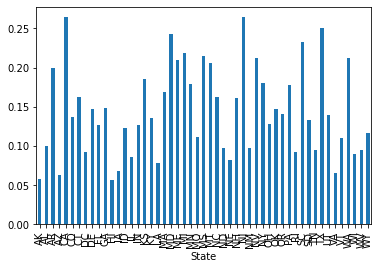

In [ ]:
orange.groupby('State')['Churn'].mean().plot(kind = 'bar')

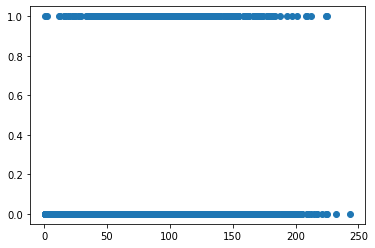

In [ ]:
plt.scatter(orange.Account_length, orange.Churn)

**Answer these**

List some (at least 3) explanatory variables from the dataframe, or that you can make using existing variables in the dataframe, that can influence churn. For each, give a brief explanation of the potential relationship, and make a prediction about the direction of the prediction (increase or decrease churn).

1. **Total Day Minutes**
    1. **Total Day Charged has a direct correlation**
    1. **Increase**
1. 
    1. 
    1. 
1. 
    1. 
    1. 
1. 
    1. 
    1. 

add as many as you wish 

**Edit this**
Write the regression equation below with the appropriate explanatory variables as posited in your answers above: 

$$
logit(Churn) = \beta_0 + \beta_1 x_1..... + e
$$

FYI, if you are using a categorical variable with 2 possible outcomes, say International_Plan (yes or no), include it in the regression equation as (baseline is assumed to be no): 
$$
+\beta_{IntlPlan}
$$


If you are using the a categorical variable with many outcomes, say State, include it using: 
$$
+ \sum_{state \ne PA }\beta_{state},
$$
where PA is the baseline reference group. Feel free to change PA to any other reference group, but be sure to do so when you run the regression as well.

In [ ]:
# Esitmate the logit model you've specified above here using statsmodels (smf)

res_ols = smf.logit('Churn ~ C(State, Treatment(reference = "PA")) + International_plan', data = orange).fit()

Optimization terminated successfully.
         Current function value: 0.374864
         Iterations 7


In [ ]:
# print the summary table of your logit model

print(res_ols.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3281
Method:                           MLE   Df Model:                           51
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                 0.09406
Time:                        03:36:11   Log-Likelihood:                -1249.4
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 1.075e-29
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -1.8952      0.412     -4.599      0.000      -2.703      -1.088
C(State, Treatment(reference="PA"))[T.

In [ ]:
# obtain the marginal effects

mfx1 = res_ols.get_margeff()


In [ ]:
# print the marginal effects summary table here

print(mfx1.summary())

        Logit Marginal Effects       
Dep. Variable:                  Churn
Method:                          dydx
At:                           overall
                                               dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
C(State, Treatment(reference="PA"))[T.AK]    -0.1328      0.082     -1.616      0.106      -0.294       0.028
C(State, Treatment(reference="PA"))[T.AL]    -0.0706      0.063     -1.119      0.263      -0.194       0.053
C(State, Treatment(reference="PA"))[T.AR]     0.0145      0.061      0.239      0.811      -0.105       0.134
C(State, Treatment(reference="PA"))[T.AZ]    -0.1110      0.075     -1.486      0.137      -0.257       0.035
C(State, Treatment(reference="PA"))[T.CA]     0.0677      0.065      1.044      0.296      -0.059       0.195
C(State, Treatment(reference="PA"))[T.CO]    -0.0151      0.062     -0.244    

**Answer these prompts**


Interpret at least 3 of the marginal effects from your model below, be sure to reference both the marginal effects and the p-values (and explain their meaning in the context of your specific model). Be sure to discuss whether the results conform to your predictions.* 

1. 
1. 
1. 


*If you have a lot of coefficients from one categorical variable, just interpret one of those (and then 2 other coefficients not from the same categorical variable). For instance, if you included state in your model, just interpret the coefficient for one state, don't need to interpret all states' coefficients. 

**Answer this**

Based on your model, what recommendations do you have for the telecom service provider?

Answer: 